In [2]:
import pandas as pd

partial_results = [
    "../data/results-experiment2-partial/r1.csv",
    "../data/results-experiment2-partial/r2.csv"
]

results = pd.concat([pd.read_csv(filepath_or_buffer=p, sep=',') for p in partial_results])

description = results.groupby(["model_type", "metric_set", "smell_models"]).describe()

description = results.filter(["model_type", "metric_set", "smell_models", "real_mcc"]).groupby(["model_type", "metric_set", "smell_models"]).describe()
description

real_mcc  \
                                                                             count   
model_type            metric_set                             smell_models            
basic-adaboost        JAVAMETRICS2_AgeInDays                 False             2.0   
                                                             True              2.0   
                      JAVAMETRICS2_AuthorFragmentation       False             2.0   
                                                             True              2.0   
                      JAVAMETRICS2_AverageNumberOfAddedLines False             2.0   
...                                                                            ...   
unscaled-randomforest nf                                     True              2.0   
                      ns                                     False             2.0   
                                                             True              2.0   
                      nuc                                    False             2.0   
                                                             True              2.0   

                                                                                     \
                                                                               mean   
model_type            metric_set                             smell_models             
basic-adaboost        JAVAMETRICS2_AgeInDays                 False         0.125387   
                                                             True          0.271562   
                      JAVAMETRICS2_AuthorFragmentation       False         0.000000   
                                                             True          0.232759   
                      JAVAMETRICS2_AverageNumberOfAddedLines False         0.213198   
...                                                                             ...   
unscaled-randomforest nf                                     True          0.325980   
                      ns                                     False         0.182265   
                                                             True          0.261124   
                      nuc                                    False         0.215018   
                                                             True          0.277794   

                                                                                     \
                                                                                std   
model_type            metric_set                             smell_models             
basic-adaboost        JAVAMETRICS2_AgeInDays                 False         0.065190   
                                                             True          0.002903   
                      JAVAMETRICS2_AuthorFragmentation       False         0.000000   
                                                             True          0.001751   
                      JAVAMETRICS2_AverageNumberOfAddedLines False         0.002141   
...                                                                             ...   
unscaled-randomforest nf                                     True          0.004742   
                      ns                                     False         0.008814   
                                                             True          0.003150   
                      nuc                                    False         0.001323   
                                                             True          0.000901   

                                                                                     \
                                                                                min   
model_type            metric_set                             smell_models             
basic-adaboost        JAVAMETRICS2_AgeInDays                 False         0.079291   
                                                             True          0.269509

In [3]:
series = description.filter([("real_mcc", "50%")]).reset_index()
series["mcc"] = series[("real_mcc", "50%")]
series


,model_type,metric_set,smell_models,real_mcc,mcc
,,,,50%,
0,basic-adaboost,JAVAMETRICS2_AgeInDays,False,0.125387,0.125387
1,basic-adaboost,JAVAMETRICS2_AgeInDays,True,0.271562,0.271562
2,basic-adaboost,JAVAMETRICS2_AuthorFragmentation,False,0.000000,0.000000
3,basic-adaboost,JAVAMETRICS2_AuthorFragmentation,True,0.232759,0.232759
4,basic-adaboost,JAVAMETRICS2_AverageNumberOfAddedLines,False,0.213198,0.213198
...,...,...,...,...,...
1045,unscaled-randomforest,nf,True,0.325980,0.325980
1046,unscaled-randomforest,ns,False,0.182265,0.182265
1047,unscaled-randomforest,ns,True,0.261124,0.261124


<AxesSubplot: xlabel='Include smell models', ylabel='MCC'>

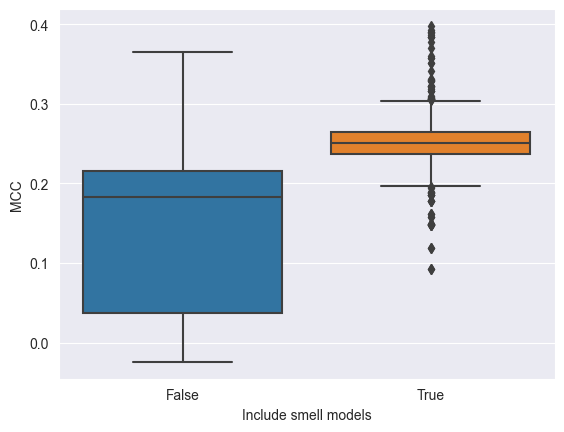

In [30]:
import seaborn as sns

smellchart_data = results.filter(["real_mcc", "smell_models"])
smellchart_data["MCC"] = smellchart_data["real_mcc"]
smellchart_data["Include smell models"] = smellchart_data["smell_models"]

sns.boxplot(
    smellchart_data, y="MCC", x="Include smell models"
)

<AxesSubplot: xlabel='Include smell models', ylabel='Precision'>

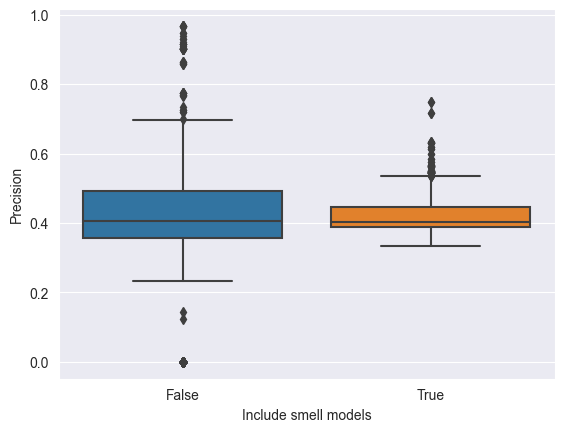

In [31]:
prec_smellchart_data = results.filter(["real_precision", "smell_models"])
prec_smellchart_data["Precision"] = prec_smellchart_data["real_precision"]
prec_smellchart_data["Include smell models"] = prec_smellchart_data["smell_models"]

sns.boxplot(
    prec_smellchart_data, y="Precision", x="Include smell models"
)


<AxesSubplot: xlabel='ML model', ylabel='MCC'>

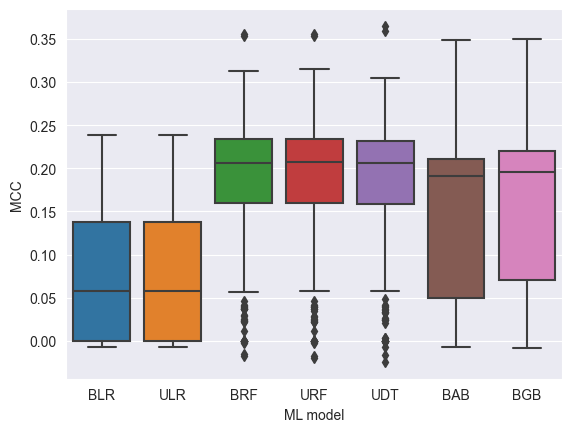

In [27]:
MODEL_NAME_MAPPING = {
    "basic-linear-ridge": "BLR",
    "unscaled-linear": "ULR",
    "basic-randomforest": "BRF",
    "unscaled-randomforest": "URF",
    "unscaled-decisiontree": "UDT",
    "basic-adaboost": "BAB",
    "basic-gradientboost": "BGB"
}


modeltype_data = results.loc[results.smell_models == False].filter(["real_mcc", "model_type"])
modeltype_data["MCC"] = modeltype_data["real_mcc"]
modeltype_data["ML model"] = modeltype_data["model_type"].map(MODEL_NAME_MAPPING)

sns.boxplot(
    modeltype_data, y="MCC", x="ML model"
)

<AxesSubplot: xlabel='ML model', ylabel='Precision'>

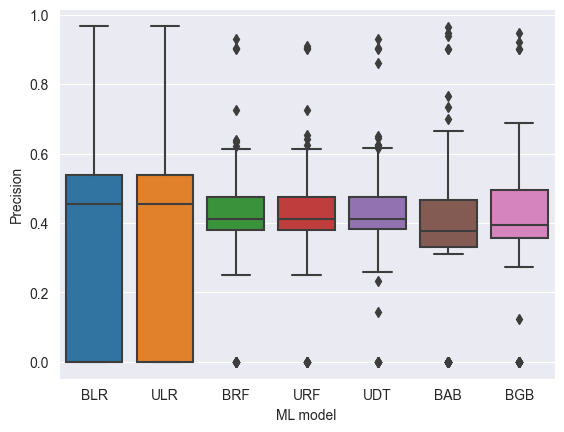

In [28]:
prec_modeltype_data = results.loc[results.smell_models == False].filter(["real_precision", "model_type"])
prec_modeltype_data["Precision"] = prec_modeltype_data["real_precision"]
prec_modeltype_data["ML model"] = prec_modeltype_data["model_type"].map(MODEL_NAME_MAPPING)

sns.boxplot(
    prec_modeltype_data, y="Precision", x="ML model"
)

[Text(0.5, 0, 'Metric set'), Text(0, 0.5, 'MCC'), []]

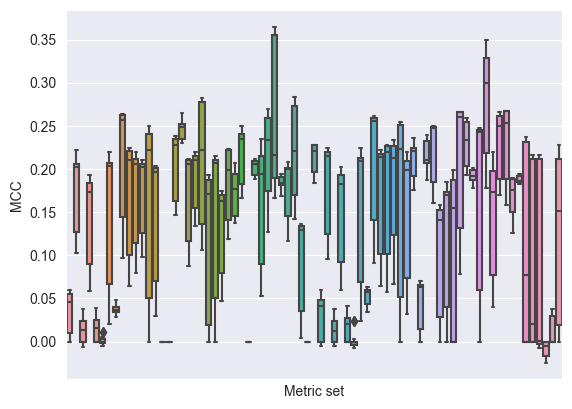

In [25]:
metrictype_data = results.loc[results.smell_models == False].filter(["real_mcc", "metric_set"])

sns.boxplot(
    metrictype_data, y="real_mcc", x="metric_set"
).set(xlabel = "Metric set", ylabel = "MCC", xticks = [])

[Text(0.5, 0, 'Metric set'), Text(0, 0.5, 'Precision'), []]

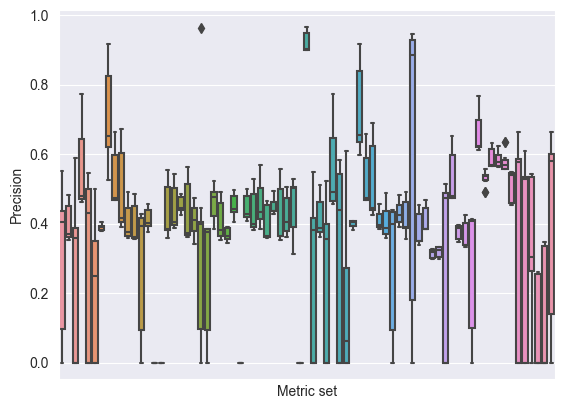

In [32]:
metrictype_data = results.loc[results.smell_models == False].filter(["real_precision", "metric_set"])

sns.boxplot(
    metrictype_data, y="real_precision", x="metric_set"
).set(xlabel="Metric set", ylabel="Precision", xticks=[])


In [43]:
metric_describable_data = results.filter(["real_precision", "real_mcc", "metric_set", "smell_models"])
metric_describable_data["mcc"] = metric_describable_data["real_mcc"]
metric_describable_data["precision"] = metric_describable_data["real_precision"]
metric_describable_data = metric_describable_data.filter(["precision", "mcc", "metric_set", "smell_models"])


grouped_data = metric_describable_data.groupby(["metric_set", "smell_models"]).describe()
grouped_data.style.to_latex(buf = "metrics-singlemetric.tex")
grouped_data

precision            \
                                                        count      mean   
metric_set                             smell_models                       
JAVAMETRICS2_AgeInDays                 False             14.0  0.330292   
                                       True              14.0  0.400230   
JAVAMETRICS2_AuthorFragmentation       False             14.0  0.000000   
                                       True              14.0  0.477166   
JAVAMETRICS2_AverageNumberOfAddedLines False             14.0  0.425151   
...                                                       ...       ...   
nf                                     True              14.0  0.569593   
ns                                     False             14.0  0.576620   
                                       True              14.0  0.529223   
nuc                                    False             14.0  0.350021   
                                       True              14.0  0.478684   

                                                                         \
                                                          std       min   
metric_set                             smell_models                       
JAVAMETRICS2_AgeInDays                 False         0.262088  0.000000   
                                       True          0.013270  0.382308   
JAVAMETRICS2_AuthorFragmentation       False         0.000000  0.000000   
                                       True          0.030606  0.451529   
JAVAMETRICS2_AverageNumberOfAddedLines False         0.090003  0.361602   
...                                                       ...       ...   
nf                                     True          0.039981  0.534336   
ns                                     False         0.026704  0.556217   
                                       True          0.022052  0.512217   
nuc                                    False         0.193154  0.000000   
                                       True          0.023849  0.436343   

                                                                         \
                                                          25%       50%   
metric_set                             smell_models                       
JAVAMETRICS2_AgeInDays                 False         0.098016  0.398975   
                                       True          0.386169  0.405354   
JAVAMETRICS2_AuthorFragmentation       False         0.000000  0.000000   
                                       True          0.456723  0.461861   
JAVAMETRICS2_AverageNumberOfAddedLines False         0.367684  0.373629   
...                                                       ...       ...   
nf                                     True          0.544750  0.547998   
ns                                     False         0.556217  0.569213   
                                       True          0.514783  0.517414   
nuc                                    False         0.263531  0.303846   
                                       True          0.466109  0.477518   

                                                                          mcc  \
                                                          75%       max count   
metric_set                             smell_models                             
JAVAMETRICS2_AgeInDays                 False         0.405334  0.964286  14.0   
                                       True          0.412504  0.414858  14.0   
JAVAMETRICS2_AuthorFragmentation       False         0.000000  0.000000  14.0   
                                       True          0.506440  0.525813  14.0   
JAVAMETRICS2_AverageNumberOfAddedLines False         0.515190  0.563902  14.0   
...                                                       ...       ...   ...   
nf                                     True          0.609416  0.631256  14.0   
ns                                     False         0.583398  0.634361  14.0   
        